# Data Analysis and Machine Learning Report

**Date of Report:** [Insert report date]

## Executive Summary

This report presents a comprehensive analysis of the "USA Housing Listings" dataset, which contains detailed information about property listings for sale in the United States. The objective of this analysis is to gain insights into the real estate market in the USA, including property types, pricing, amenities, and geographical locations. Additionally, this dataset serves as the foundation for the development of machine learning models for predictive analysis.

### Dataset Overview

- **Number of Records:** [Insert number of records]
- **Data Collection Period:** The dataset is updated periodically.
- **Available Information:** The dataset encompasses data such as property prices, types, square footage, bedrooms, bathrooms, and various amenities like pet allowances, wheelchair accessibility, and more.

This report not only delves into exploratory data analysis but also highlights the application of machine learning models for predictive purposes, including price prediction and property type classification.

## Introduction

The "USA Housing Listings" dataset, sourced from Craigslist, is a rich repository of information essential for a holistic understanding of the real estate landscape in the United States. Beyond providing valuable insights, it serves as the basis for the development of machine learning models, adding a predictive dimension to the analysis.

[Include any specific objectives, goals, or additional context here.]

## Exploratory Data Analysis

[Insert sections for EDA, data cleaning, visualizations, and insights.]

## Machine Learning Models

[Detail the machine learning models being employed, their objectives, and methodologies.]

## Conclusion

[Summarize key findings, insights, and any future directions.]

## Property Listings Table

For reference, the following table describes the columns within the "USA Housing Listings" dataset:


| Column Name               | Description                                       |
|---------------------------|---------------------------------------------------|
| id                        | Unique identifier for each listing.              |
| url                       | Listing URL for more details.                   |
| region                    | Geographical region or city where the property is located. |
| region_url                | URL of the region where the property is located. |
| price                     | Property sale price.                             |
| type                      | Property type (house, apartment, etc.).         |
| sqfeet                    | Property square footage in square feet.         |
| beds                      | Number of bedrooms in the property.             |
| baths                     | Number of bathrooms in the property.            |
| cats_allowed              | Indication if cats are allowed (1 for allowed, 0 for not allowed). |
| dogs_allowed              | Indication if dogs are allowed (1 for allowed, 0 for not allowed). |
| smoking_allowed           | Indication if smoking is allowed (1 for allowed, 0 for not allowed). |
| wheelchair_access         | Indication if the property is wheelchair accessible (1 for accessible, 0 for not accessible). |
| electric_vehicle_charge   | Indication if the property offers electric vehicle charging (1 for available, 0 for not available). |
| comes_furnished           | Indication if the property is furnished (1 for furnished, 0 for unfurnished). |
| laundry_options           | Laundry facilities available on the property (e.g., on-site, in-unit, etc.). |
| parking_options           | Parking options available on the property (e.g., garage, street, etc.). |
| image_url                 | URL of an image of the property.                |
| description               | Description of the property provided in the listing. |
| lat                       | Latitude of the property's location.             |
| long                      | Longitude of the property's location.            |
| state                     | State in which the property is located.        |

#### Real Table
| id | url | region | region_url | price | type | sqfeet | beds | baths | cats_allowed | dogs_allowed | smoking_allowed | wheelchair_access | electric_vehicle_charge | comes_furnished | laundry_options | parking_options | image_url | description | lat | long | state |
|----|-----|--------|------------|-------|------|--------|------|-------|-------------|-------------|-----------------|-------------------|-------------------------|----------------|-----------------|----------------|-----------|-------------|-----|------|-------|
| 1  | [Link](url) | New York | [New York Region](region_url) | $500,000 | House | 2000 | 3 | 2 | 1 | 1 | 0 | 1 | 1 | 1 | On-site | Garage | [Image Link](image_url) | Beautiful 3-bedroom house in New York City | 40.7128 | -74.0060 | NY |
| 2  | [Link](url) | Los Angeles | [LA Region](region_url) | $750,000 | Apartment | 1200 | 2 | 2 | 0 | 1 | 1 | 0 | 0 | 1 | In-unit | Street | [Image Link](image_url) | Modern 2-bedroom apartment in the heart of LA | 34.0522 | -118.2437 | CA |
| 3  | [Link](url) | Chicago | [Chicago Region](region_url) | $400,000 | Condo | 1000 | 1 | 1 | 1 | 0 | 1 | 1 | 0 | 0 | On-site | Covered | [Image Link](image_url) | Cozy 1-bedroom condo in downtown Chicago | 41.8781 | -87.6298 | IL |
| ...| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |




In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [87]:
dataset = pd.read_csv('housing.csv')
dataset.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [88]:
dataset.columns 

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [90]:
dataset.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


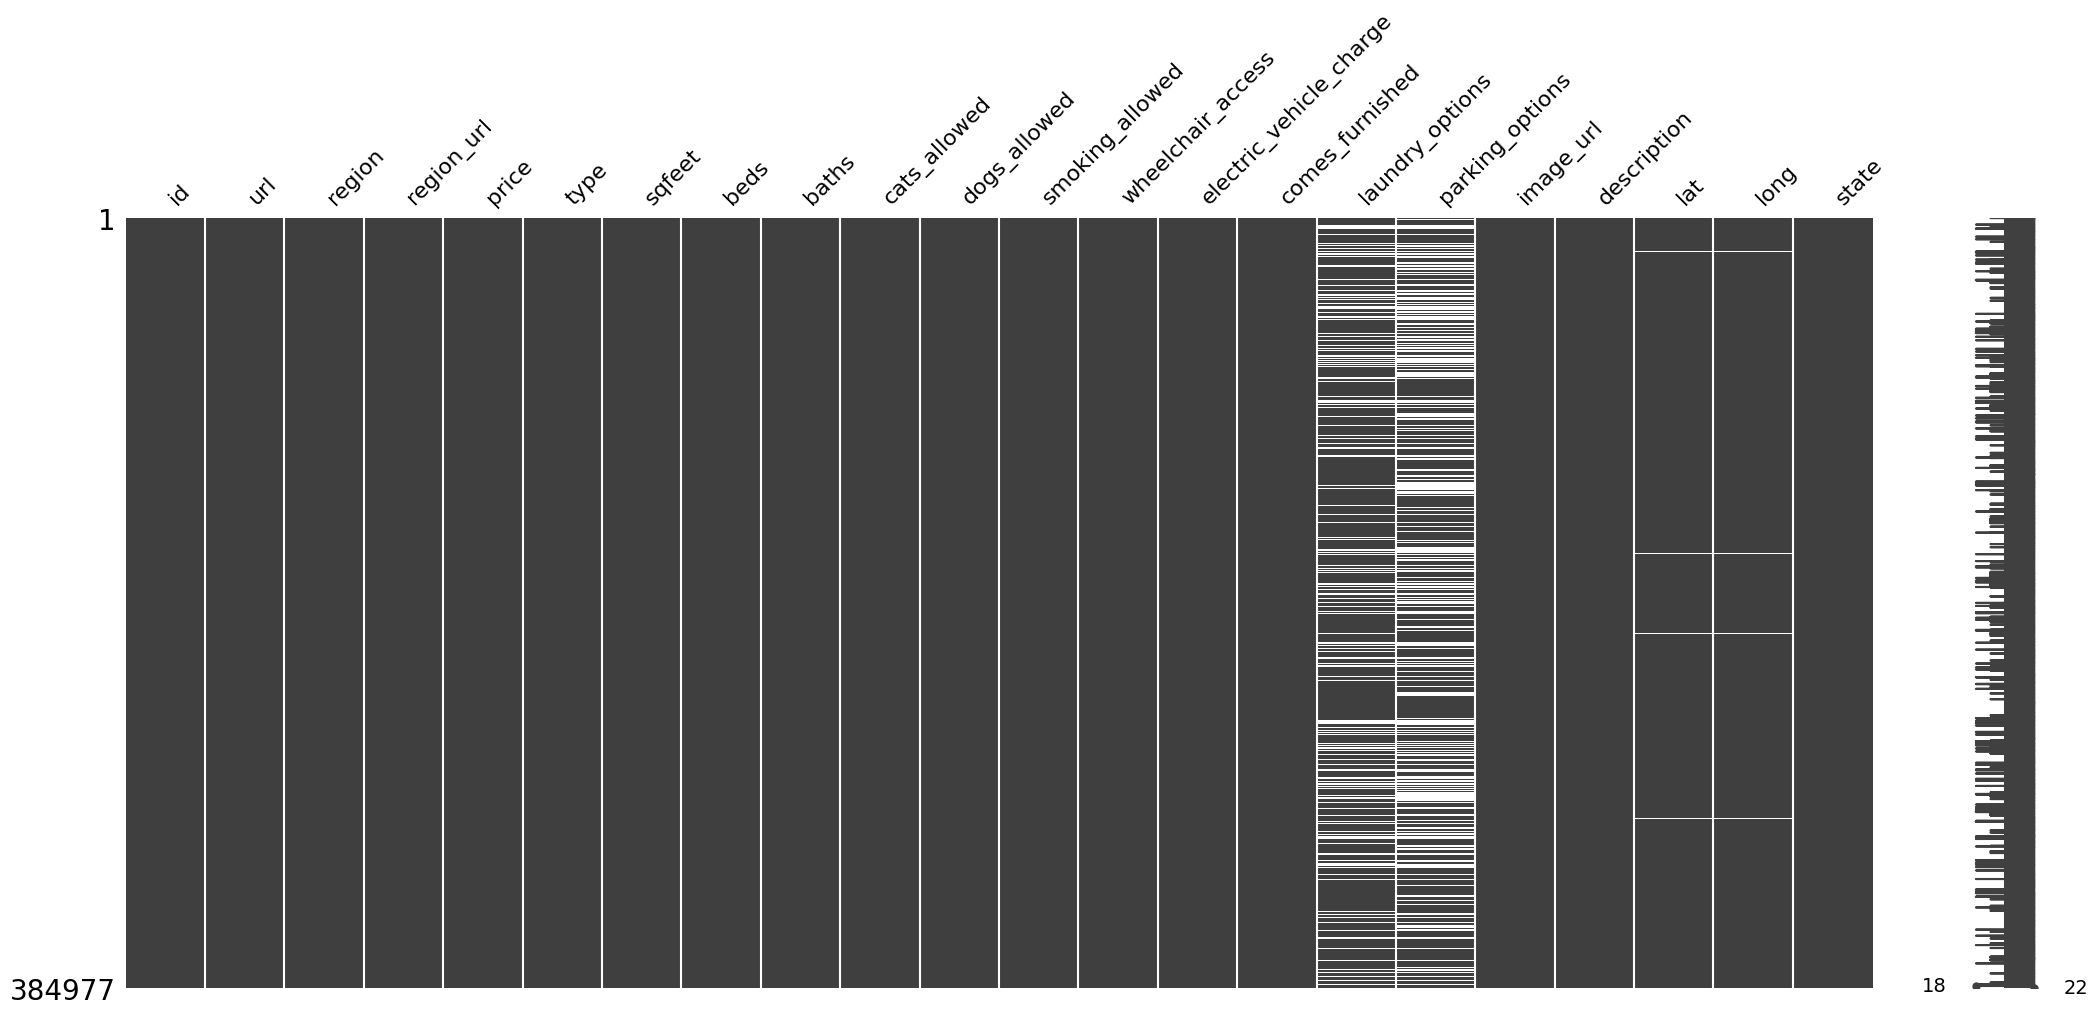

In [91]:

msno.matrix(dataset)
plt.show()


In [92]:
unique_value_counts = dataset.nunique()
print(unique_value_counts)


id                         384977
url                        384977
region                        404
region_url                    413
price                        3961
type                           12
sqfeet                       3277
beds                           11
baths                          20
cats_allowed                    2
dogs_allowed                    2
smoking_allowed                 2
wheelchair_access               2
electric_vehicle_charge         2
comes_furnished                 2
laundry_options                 5
parking_options                 7
image_url                  181068
description                280836
lat                         56772
long                        54035
state                          51
dtype: int64


In [93]:
del_columns = ['laundry_options', 'parking_options', 'id', 'url', 'image_url', 'region_url', 'description']
dataset = dataset.drop(del_columns, axis=1)
dataset.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'lat', 'long', 'state'],
      dtype='object')

In [94]:
# Verifique os valores faltantes em cada coluna
valores_faltantes = dataset.isnull().sum()

# Exiba o número de valores faltantes por coluna
print(valores_faltantes)


region                        0
price                         0
type                          0
sqfeet                        0
beds                          0
baths                         0
cats_allowed                  0
dogs_allowed                  0
smoking_allowed               0
wheelchair_access             0
electric_vehicle_charge       0
comes_furnished               0
lat                        1918
long                       1918
state                         0
dtype: int64


In [95]:
# Exclua as linhas que contenham qualquer valor faltante
dataset = dataset.dropna()


In [96]:
analysis_df = dataset.copy()
analysis_df.head()


,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,39.5357,-119.805,ca


In [97]:
# Verifique os valores faltantes em cada coluna
valores_faltantes = analysis_df.isnull().sum()

# Exiba o número de valores faltantes por coluna
print(valores_faltantes)


region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
lat                        0
long                       0
state                      0
dtype: int64


In [98]:
from sklearn.preprocessing import LabelEncoder

# Encontre e codifique todas as colunas de texto no DataFrame
for col_name in analysis_df.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    analysis_df[col_name] = label_encoder.fit_transform(analysis_df[col_name])



In [99]:
analysis_df

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
0,286,1148,0,1078,3,2.0,1,1,0,0,0,0,39.5483,-119.796,4
1,286,1200,2,1001,2,2.0,0,0,0,0,0,0,39.5026,-119.789,4
2,286,1813,0,1683,2,2.0,1,1,1,0,0,0,39.6269,-119.708,4
3,286,1095,0,708,1,1.0,1,1,1,0,0,0,39.4477,-119.771,4
4,286,289,0,250,0,1.0,1,1,1,1,0,1,39.5357,-119.805,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,286,1295,0,957,2,2.0,1,1,1,0,0,0,39.4477,-119.771,4
384973,286,1549,0,1034,2,2.0,1,1,0,0,0,0,39.6269,-119.708,4
384974,286,1249,0,840,2,1.0,1,1,1,0,0,0,39.5358,-119.746,4
384975,286,1429,0,976,2,2.0,1,1,1,0,0,0,39.5585,-119.703,4


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'df' seja o seu DataFrame

# Calcule a matriz de correlação
correlation_matrix = analysis_df.corr()

# Crie um mapa de calor com a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()


Mean Squared Error: 9899308488.644846
R-squared (R2) Score: -0.2208292119327011


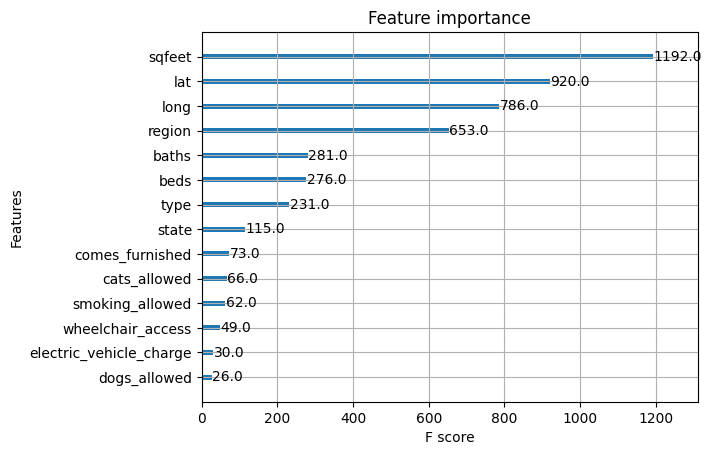

In [102]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

# Suponha que 'X' são seus recursos (colunas) e 'y' são seus rótulos.
X = analysis_df.drop('price', axis=1)  # Substitua 'target_column' pela coluna alvo real
y = analysis_df['price']

# Divisão dos dados em conjuntos de treinamento e teste (por exemplo, 80% treinamento e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie um modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

# Treine o modelo no conjunto de treinamento
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

# Plot das importâncias das colunas
plot_importance(model)
plt.show()
